In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
weather_measurements = """SELECT m.prcp, m.date 
                        FROM measurement as m 
                        Where (date BETWEEN '2016-08-22' And '2017-08-23')"""
df = pd.read_sql_query(weather_measurements, engine)
df2 = df.fillna(0)
# df2.set_index('date', inplace=True)
# df2 = df2.sort_values('date')
df2.tail()

,prcp,date
2232,0.09,2017-08-19
2233,0.00,2017-08-20
2234,0.56,2017-08-21
2235,0.50,2017-08-22
2236,0.45,2017-08-23


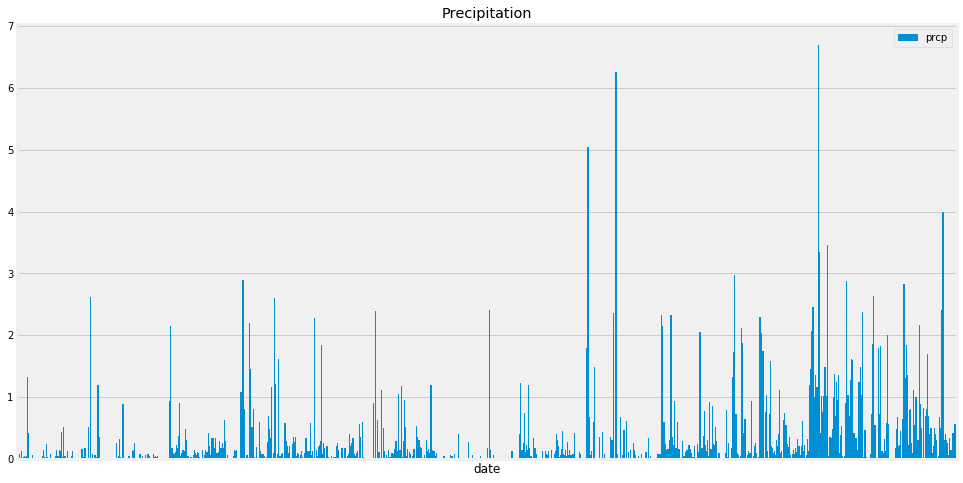

In [12]:
df2.plot(kind="bar", x="date", y="prcp", width=3, figsize=(15,8), title="Precipitation")
plt.xticks([])
plt.show()

![precipitation](Images/precipitation.png)

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [14]:
# Design a query to show how many stations are available in this dataset?
station_count = """select m.station
                FROM measurement as m
                group by 1"""
station_count_df = pd.read_sql_query(station_count, engine)
station_count_df

,station
0,USC00511918
1,USC00513117
2,USC00514830
3,USC00516128
4,USC00517948
5,USC00518838
6,USC00519281
7,USC00519397
8,USC00519523


In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = """select m.station, COUNT(m.id) as Total_Station_Rows 
                    FROM measurement as m
                    group by 1
                    ORDER BY 2 DESC"""
station_activity_df = pd.read_sql_query(station_activity, engine)
station_activity_df

,station,Total_Station_Rows
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_table = """select m.station, COUNT(m.id), min(tobs) As Min_temp, max(tobs) as max_temp, avg(tobs) as avg_temp
                FROM measurement as m
                group by 1
                ORDER BY 2 DESC"""
temp_table_df = pd.read_sql_query(temp_table, engine)
temp_table_df

,station,COUNT(m.id),Min_temp,max_temp,avg_temp
0,USC00519281,2772,54.0,85.0,71.663781
1,USC00519397,2724,56.0,87.0,74.553231
2,USC00513117,2709,59.0,85.0,72.689184
3,USC00519523,2669,56.0,85.0,74.543649
4,USC00516128,2612,58.0,84.0,70.915008
5,USC00514830,2202,58.0,85.0,74.873297
6,USC00511918,1979,53.0,87.0,71.615968
7,USC00517948,1372,58.0,87.0,74.684402
8,USC00518838,511,58.0,83.0,72.724070


In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_USC00519281 = '''select m.station, m.date, m.tobs as temp
                        FROM measurement as m
                        WHERE(m.station = 'USC00519281'AND m.date BETWEEN '2016-08-18'AND'2017-08-18')'''
station_USC00519281_df = pd.read_sql_query(station_USC00519281, engine)
station_USC00519281_df.head()

,station,date,temp
0,USC00519281,2016-08-18,80.0
1,USC00519281,2016-08-19,79.0
2,USC00519281,2016-08-20,81.0
3,USC00519281,2016-08-21,79.0
4,USC00519281,2016-08-22,78.0


Text(0, 0.5, 'frequency')

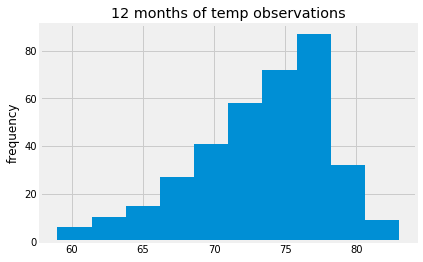

In [18]:
station_USC00519281_df.hist()
plt.title("12 months of temp observations")
plt.ylabel('frequency')

![precipitation](Images/station-histogram.png)

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
print(calc_temps('2016-08-23', '2017-08-23'))

[(58.0, 74.59058295964125, 87.0)]


In [21]:
#Verification of the above
temp_cal = '''SELECT MIN(m.tobs) AS Tmin,
            AVG(m.tobs) AS Tavg,
            MAX(m.tobs) AS Tmax
            FROM measurement AS m
            WHERE m.date >= '2016-8-23' AND
            m.date <= '2017-8-23'
'''
    
temp_cal_df = pd.read_sql_query(temp_cal, engine)
temp_cal_df


,Tmin,Tavg,Tmax
0,58.0,74.14388,87.0


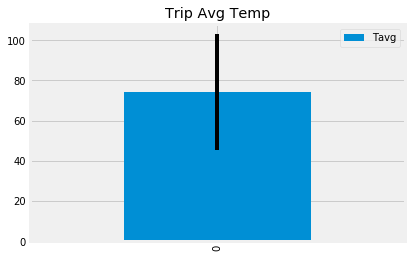

In [22]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
error = 87-58
temp_cal_df.plot(kind="bar", y="Tavg", title="Trip Avg Temp", yerr=error)

In [23]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
total_rainfall_per_station = """SELECT m.station, 
                        COUNT(m.prcp) as Total_rain,
                        m.date,
                        s.name,
                        s.latitude,
                        s.longitude,
                        s.elevation
                        FROM measurement as m
                        LEFT JOIN station as s
                        on(m.station = s.station)
                        WHERE m.date >= '2016-8-23' AND
                        m.date <= '2017-8-23'
                        GROUP BY	1
                        ORDER BY 2 DESC
"""
total_rainfall_per_station_df = pd.read_sql_query(total_rainfall_per_station, engine)
total_rainfall_per_station_df.head()


,station,Total_rain,date,name,latitude,longitude,elevation
0,USC00519397,230,2017-01-01,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00519281,221,2017-01-01,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00513117,212,2017-01-01,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00516128,204,2017-01-01,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
4,USC00519523,190,2017-01-01,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
